# Catastrophic cancellation

In this notebook, we examine the cancellation errors due to subtraction. Paying attention to errors in floating point representation is important as these numerical disasters can attest:
+ [Douglas Arnold - University of Minnesota](http://www-users.math.umn.edu/~arnold//disasters/)
+ [Todd Arbogast - University of Texas at Austin](https://web.ma.utexas.edu/users/arbogast/misc/disasters.html)




I highly encourage you to read these historical examples!    
    


In [10]:

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Example 1: Examing the conditioning of subtraction.

In [11]:
x = 0.1 + 10**(-14.)
y = 0.1 

truediff = 10**(-14.)
print("The number x is %0.15g, y is %g, and the true difference is %g"%(x,y,truediff))

The number x is 0.10000000000001, y is 0.1, and the true difference is 1e-14


### Compute the absolute and relative errors of the subtraction 

In [12]:
computeddiff = x-y

abs_err = np.abs(truediff - computeddiff)
rel_err = abs_err/np.abs(truediff)

print("The absolute error in subtraction is %.6g" %(abs_err))
print("The relative error in the subtraction is %0.6g" %(rel_err))

The absolute error in subtraction is 5.88501e-18
The relative error in the subtraction is 0.000588501


We observe that the absolute error is small, but the relative error is high. Why?

### Error bounds

Let $\tilde{x}$ and $\tilde{y}$ be approximations to $x$ and $y$ respectively. We know the bounds 

+ Absolute error
$$ |(\tilde{x} - \tilde{y}) - (x-y)| \leq 2 \max\left\{ |\tilde{x}-x|,|\tilde{y}-y| \right\}, $$ 

+ Relative error 
$$ \frac{|(\tilde{x} - \tilde{y}) - (x-y)|}{|x-y|} \leq \frac{|x| + |y|}{|x-y|} \max\left\{ \frac{|\tilde{x}-x|}{|x|},\frac{|\tilde{y}-y|}{|y|} \right\}. $$




In this example:

+ The condition number is

$$ \kappa = \frac{|x| + |y|}{|x-y|} .$$
 
+ Since $\tilde{x}$ and $\tilde{y}$ are floating point representations (in IEEE double precision) of $x$ and $y$ respectively: 
$$ \frac{|\tilde{x}-x|}{|x|} \leq u \qquad \frac{|\tilde{y}-y|}{|y|} \leq u,$$

where $u \approx 1.11 \times 10^{-16}$ is the unit roundoff. 

In [13]:
# Compute the condition number
cond = 2.0000000000001*10**(13) # (|x|+|y|)/|x-y|

# Extract information about machine epsilon and unit roundoff-error
eps = np.finfo(float).eps
u = eps/2.

print('The condition number is (approximately) %g' %(cond))
print('Machine epsilon is %.5g and unit roundoff is %.5g'%(eps,u))
print('The upper bound for the relative error is (approximately) %.6g'%(cond*u))

print('By comparison the true relative error is %.6g' %(rel_err))

The condition number is (approximately) 2e+13
Machine epsilon is 2.2204e-16 and unit roundoff is 1.1102e-16
The upper bound for the relative error is (approximately) 0.00222045
By comparison the true relative error is 0.000588501


### Observations:

+ We see that the upper bound gives us an indication of how large the relative error can be; indeed, the computed error is within this bound. 

+ In the worst case scenario, the upper bound suggests that we can only expect the solution to be accurate to 3 decimal places.  

## Example 2: Polynomial evaluation

We consider the polynomial $p(x) = (x-2)^9$, which is equivalently 

$$  \begin{align} p(x) = &  \>x^9 - 18x^8 + 144x^7 - 672x^6 + 2016x^5 \\ & - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512.
\end{align}$$ 


We see what happens when compute it numerically using two mathematically equivalent ways. 

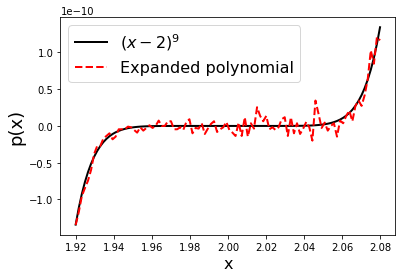

In [14]:
x = np.linspace(1.92,2.08,100)

p1x = (x-2.)**9.
p2x = x**9. - 18.*x**8. + 144.*x**7. - 672.*x**6. + 2016.*x**5. - 4032.*x**4 + 5376.*x**3 - 4608.*x**2 + 2304.*x - 512.


plt.plot(x,p1x, 'k-', x, p2x, 'r--', linewidth = 2.0)
plt.xlabel('x', fontsize = 16)
plt.ylabel('p(x)', fontsize = 18)
plt.legend(('$(x-2)^9$','Expanded polynomial'),fontsize = 16, loc = 'upper left')

## Example 3: Evaluating 1 - cosx 

Consider the function 

$$ f(x) = 1 - \cos x \qquad x \approx 0. $$

An alternative representation to $f(x)$ is 

$$ f(x) = (1 - \cos x)\frac{1+\cos x}{1 + \cos x} = \frac{1 - \cos^2 x}{1+ \cos(x)} = \frac{\sin^2x}{1+\cos x}.$$



Mathematically both formalas are equivalent when $x \approx 0$. What happens when we evaluate them numerically?

In [15]:
x = 10**(-10.)

f1x = 1 - np.cos(x)
f2x = np.sin(x)**2./(1+np.cos(x))
print('The results of the two formulas are %.12g and %.12g' %(f1x, f2x))

The results of the two formulas are 0 and 5e-21


Another related formulation is $$ f(x) = 1 - \cos(x) = 2\sin^2(x/2) .$$


Implementing this formula, we get 

In [16]:
f3x = 2*np.sin(x/2)**2.
print('The results of the two formulas are %.12g and %.12g' %(f1x, f2x))
print('Third formula gives %g' % (f3x))

The results of the two formulas are 0 and 5e-21
Third formula gives 5e-21


### Bottom line:
+ the first formula is subject to cancellation errors since $\cos(x) \approx 1$ when $x$ is small. 
    
+ The two other formulations avoid this by equivalent mathematical expressions. 

+ It's time to dust off those old math textbooks!

## Example 4: Quadratic Equations

Let $p,q$ be positive numbers and consider the quadratic equation 
$$x^2 -2px - q = 0,$$
with the roots (verify this!)
$$ x_{\pm} = -p \pm \sqrt{p^2 + q}.$$


Let us fix the following parameters:

In [17]:
p = 10**10.
q = 1

We compute the roots naively using the formula, and using numpy's default implementation

In [18]:
d = np.sqrt(p**2 + q)
xp = d - p 
xm = d + p
print('The two roots are %g and %g '% (xp, xm))

xp, xm = np.roots([1,-2*p,-q])
print('Using Numpy implementation, the roots are %g and %g ' %(xp, xm))

The two roots are 0 and 2e+10 
Using Numpy implementation, the roots are 2e+10 and -5e-11 


We see that one of the roots is completely wrong because $\sqrt{p^2 + q} \approx p$, and there is the potential for cancellation errors. If we evaluate the positive root using the alternative formula 


$$ x_+ = (-p + \sqrt{p^2 + q})\frac{-p - \sqrt{p^2 + q}}{-p - \sqrt{p^2 + q}} = \frac{-q}{-p - \sqrt{p^2 + q}} = \frac{-q}{x_-}.$$


Let's see if we do better with this formula:

In [19]:
print("Improved computation of $x_+$ gives %g"% (-q/xp))

Improved computation of $x_+$ gives -5e-11
